In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import cv2
from tqdm import tqdm

from lib.data import load_extracted_samples, load_extracted_sample
from lib.details_ocr import extract_lines_ocr, filter_detail_lines, split_detail_line
from lib.image_preprocessing import deskew_image
from lib.ocr import get_ocrs
from lib.util import display_image

In [4]:
samples = load_extracted_samples("only_ocr")
len(samples)

6294

In [5]:
sample = load_extracted_sample("Email_Attachment_2022-11-27_155.pdf")
ocr = get_ocrs(sample)["paddleocr_deskew"]

page_index = 0
page_ocr = ocr[page_index]
image_path = sample["images"][page_index]
image = cv2.imread(image_path)
image = deskew_image(image)

In [6]:
sample

{'filename': 'Email_Attachment_2022-11-27_155.pdf',
 'size': 2520692,
 'pages': 2,
 'text': '',
 'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Email_Attachment_2022-11-27_155.pdf/0.png',
  '/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Email_Attachment_2022-11-27_155.pdf/1.png']}

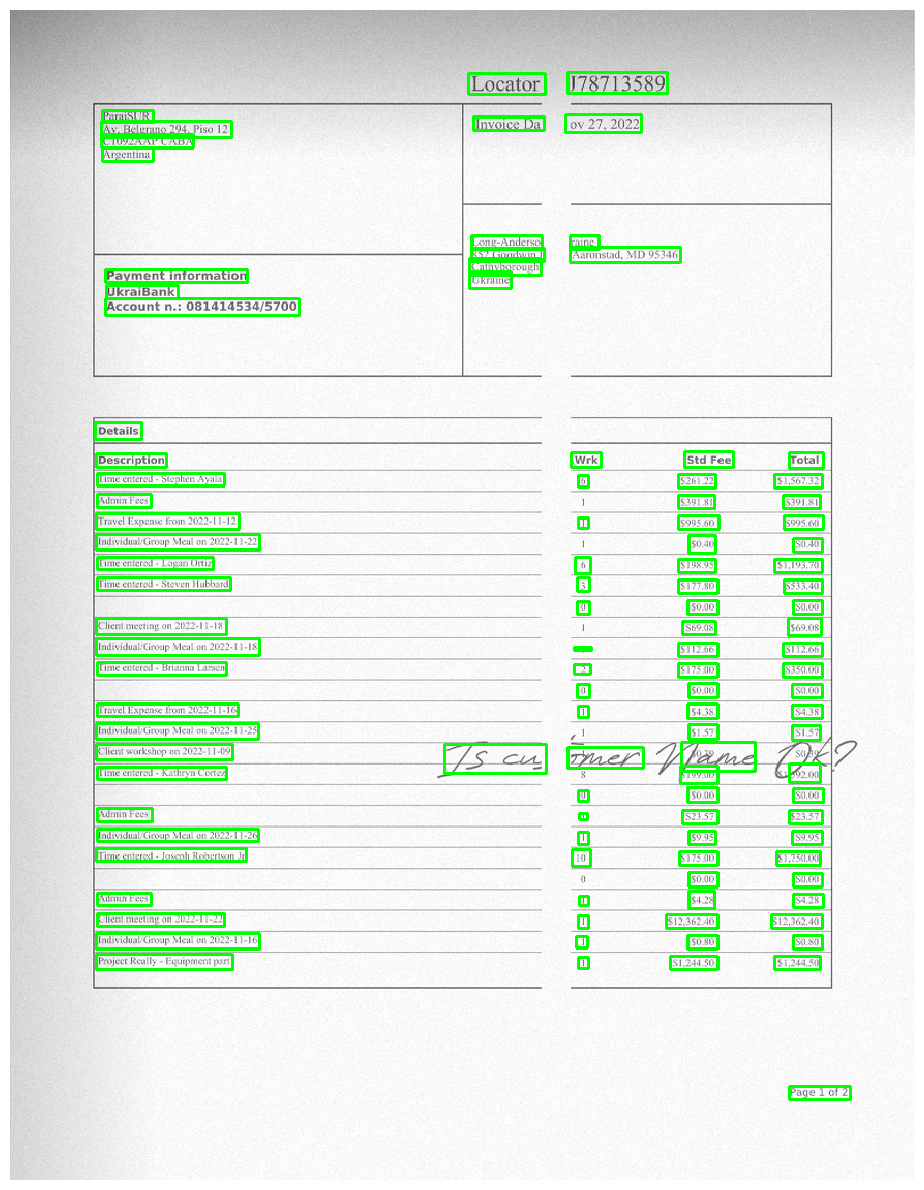

In [7]:
image_boxes = image.copy()

for box in page_ocr["boxes"]:
    cv2.rectangle(image_boxes, box["bounds"][0], box["bounds"][2], (0, 255, 0), 2)

display_image(image_boxes)

In [8]:
def display_lines(image, lines):
    img = image.copy()

    for boxes in lines:
        x_min = min(boxes, key=lambda k: k["bounds"][0][0])["bounds"][0][0]
        x_max = max(boxes, key=lambda k: k["bounds"][2][0])["bounds"][2][0]
        y_min = min(boxes, key=lambda k: k["bounds"][0][1])["bounds"][0][1]
        y_max = max(boxes, key=lambda k: k["bounds"][2][1])["bounds"][2][1]
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2) # type: ignore

    display_image(img)

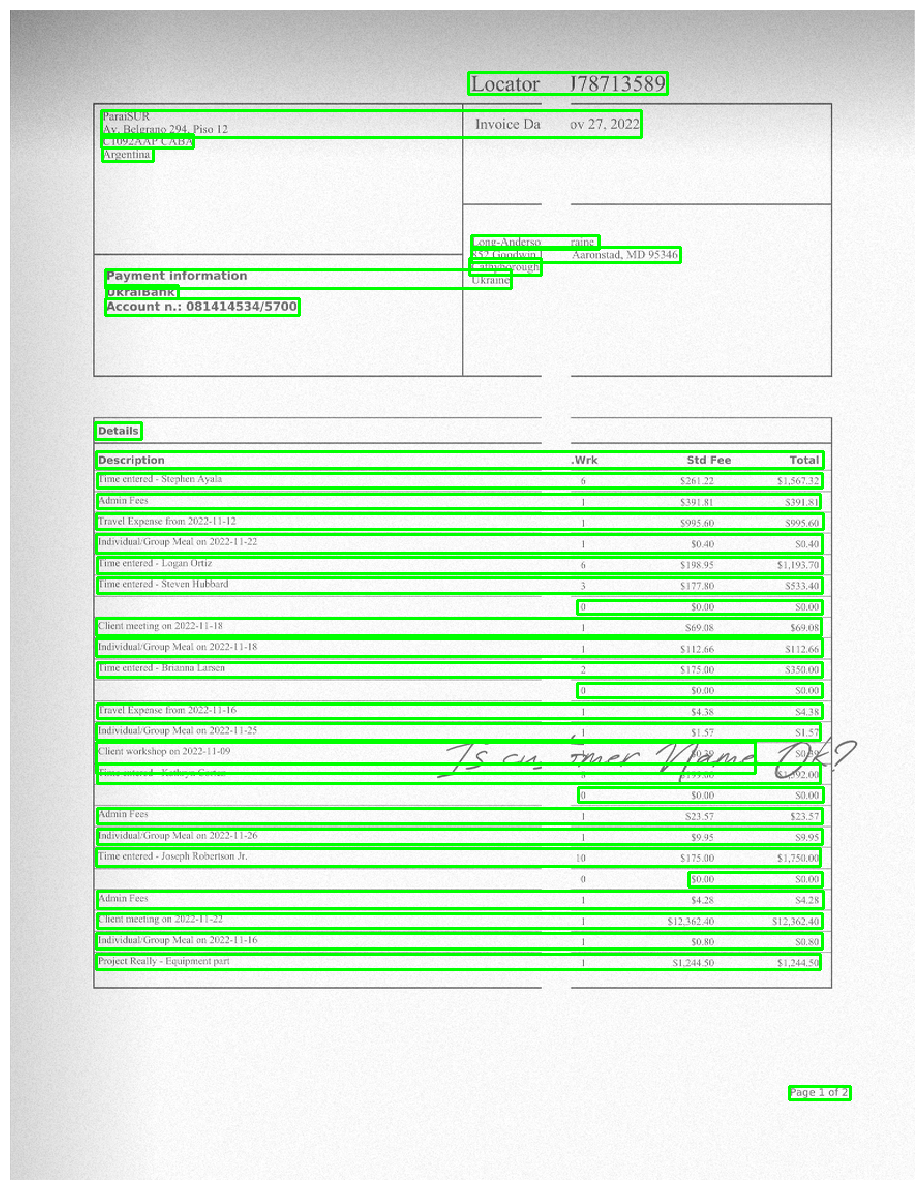

In [9]:
lines = extract_lines_ocr(page_ocr["boxes"])
display_lines(image, lines)

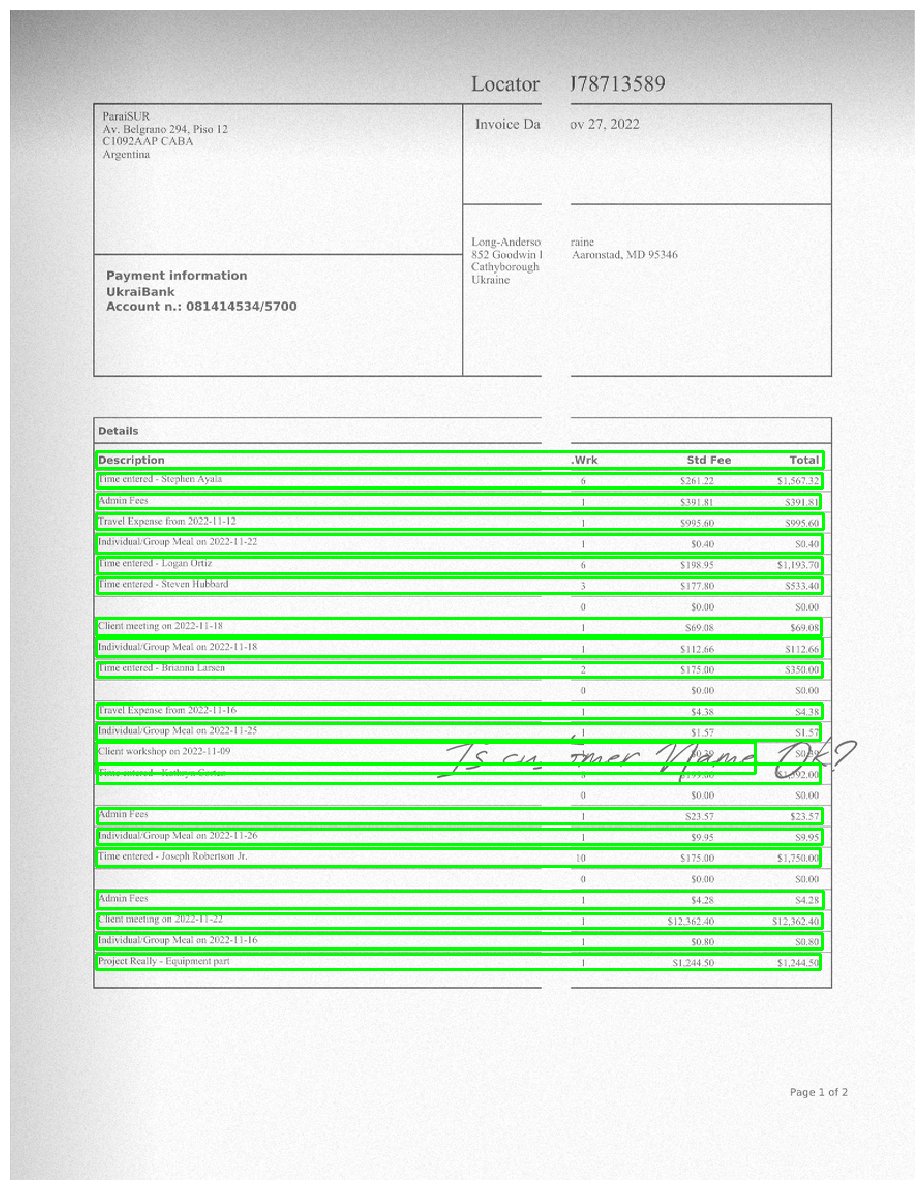

In [10]:
detail_lines = filter_detail_lines(lines)
display_lines(image, detail_lines)

In [11]:
[split_detail_line(line) for line in detail_lines]

[None,
 {'desc': 'Time entered -Stephen Ayala 6 $261.22',
  'total': 1567.32,
  'total_str': '$1,567.32'},
 None,
 None,
 {'desc': 'Individual/Group Meal on 2022-11-22 $0.40',
  'total': 0.4,
  'total_str': 'S0.40'},
 {'desc': 'Time entered -Logan Ortiz 6 $198.95',
  'total': 1193.7,
  'total_str': '$1,193.70'},
 {'desc': 'Time entered -Steven Hubbard 3 $177.80',
  'total': 533.4,
  'total_str': 'S533.40'},
 {'desc': 'Client meeting on 2022-11-18 S69.08',
  'total': 69.0,
  'total_str': '$69.0$'},
 {'desc': 'Individual/Group Meal on 2022-11-18 1 S112.66',
  'total': 112.66,
  'total_str': 'S112.66'},
 {'desc': 'Time entered -Brianna Larsen 2 $175.00',
  'total': 350.0,
  'total_str': 'S350.00'},
 {'desc': 'Travel Expense from 2022-11-16 1 $4.38',
  'total': 4.38,
  'total_str': 'S4.38'},
 {'desc': 'Individual/Group Meal on 2022-11-25 $1.57',
  'total': 1.57,
  'total_str': 'S1.57'},
 None,
 None,
 {'desc': 'Admin Fees T S23.57', 'total': 23.57, 'total_str': '$23.57'},
 {'desc': 'Indivi

In [16]:
# calcular el % de None's que hay en promedio en los samples
none_avgs = []

for sample in tqdm(samples):
    ocrs = get_ocrs(sample)
    if "paddleocr" in ocrs:
        all_lines = []

        for page_ocr in ocrs["paddleocr"]: # paddleocr_deskew
            all_lines += extract_lines_ocr(page_ocr["boxes"])
        
        detail_lines = filter_detail_lines(all_lines)
        splitted_lines = [split_detail_line(line) for line in detail_lines]

        num_nones = sum([1 for line in splitted_lines if line is None])
        num_lines = len(splitted_lines)

        # print(sample, splitted_lines)
        none_avgs.append((sample, num_nones / num_lines))

  0%|          | 0/6294 [00:00<?, ?it/s]

100%|██████████| 6294/6294 [02:01<00:00, 51.61it/s]


[({'filename': 'Incoming_inv_ParaisurZ996560_6681.pdf',
   'size': 1025812,
   'pages': 1,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Incoming_inv_ParaisurZ996560_6681.pdf/0.png']},
  0.6363636363636364),
 ({'filename': 'Invoice (2250).pdf',
   'size': 1392045,
   'pages': 2,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Invoice (2250).pdf/0.png',
    '/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Invoice (2250).pdf/1.png']},
  0.23333333333333334),
 ({'filename': '2021-11-15_2759.pdf',
   'size': 1955955,
   'pages': 2,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/2021-11-15_2759.pdf/0.png',
    '/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/2021-11-15_2759.pdf/1.png']},
  0.09090909090909091),
 ({'filename': 'Incoming_inv_ParaisurZ996560_3201.pdf',
   'size': 1025630,
   'pages': 1,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Inco

In [17]:
# sort by avg
sorted(none_avgs, key=lambda x: -x[1])[:2]

[({'filename': '383580893.pdf',
   'size': 1924793,
   'pages': 2,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/383580893.pdf/0.png',
    '/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/383580893.pdf/1.png']},
  1.0),
 ({'filename': 'Email_Attachment_2021-10-23_7847.pdf',
   'size': 512397,
   'pages': 1,
   'text': '',
   'images': ['/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Email_Attachment_2021-10-23_7847.pdf/0.png']},
  1.0)]

(array([1086., 1609.,  854.,  449.,  365.,  297.,  181.,  141.,  179.,
         125.,  242.,  206.,  149.,  126.,   64.,   74.,   48.,   34.,
          18.,   47.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

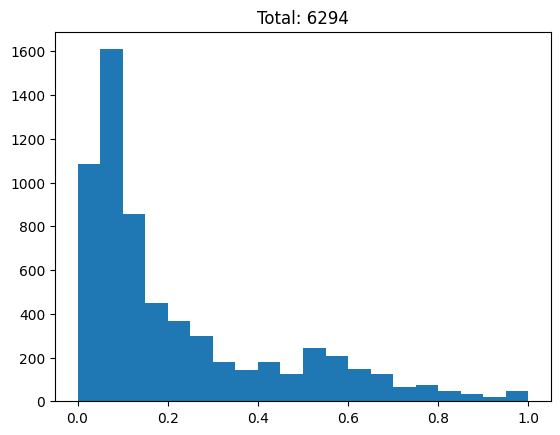

In [18]:
# plot avg distribution
import matplotlib.pyplot as plt

plt.title("Total: " + str(len(none_avgs)))
plt.hist([x[1] for x in none_avgs], bins=20, range=(0, 1))